In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from datetime import datetime

In [47]:
from sklearn.metrics import mean_squared_error
from math import sqrt 

Using saas.csv or log data from API usage

1) Split data (train/test) and resample by any period, except daily, and aggregate using the sum.

In [3]:
saas = pd.read_csv('saas.csv')

In [6]:
saas = saas.rename(columns = {'Month_Invoiced': 'month_invoiced'
                      , 'Customer_Id': 'customer_id'
                      , 'Invoice_Id': 'invoice_id'
                      , 'Subscription_Type': 'subscription_type'
                      , 'Amount': 'amount'})

In [9]:
saas.month_invoiced = pd.to_datetime(saas.month_invoiced)

In [10]:
saas = saas.set_index('month_invoiced')

saas.head()

,customer_id,invoice_id,subscription_type,amount
month_invoiced,,,,
2014-01-31,1000000,5000000,0.0,0.0
2014-01-31,1000001,5000001,2.0,10.0
2014-01-31,1000002,5000002,0.0,0.0
2014-01-31,1000003,5000003,0.0,0.0
2014-01-31,1000004,5000004,1.0,5.0


In [19]:
saas_resample = saas.resample('M').amount.sum()

In [24]:
saas_resample = pd.DataFrame(saas_resample)

In [11]:
saas.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 790458 entries, 2014-01-31 to 2017-12-31
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer_id        790458 non-null  int64  
 1   invoice_id         790458 non-null  int64  
 2   subscription_type  790458 non-null  float64
 3   amount             790458 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 30.2 MB


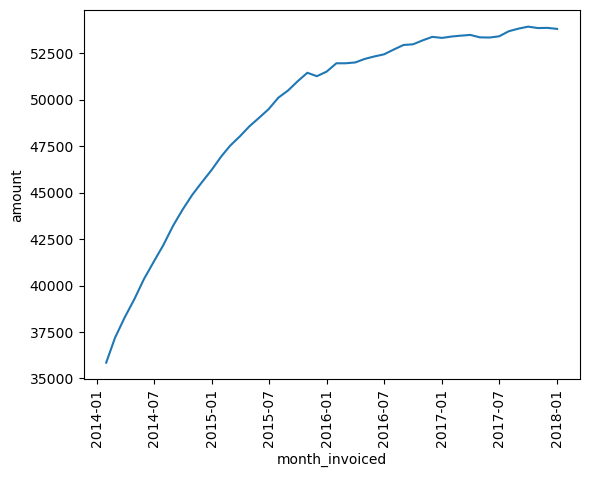

In [26]:
sns.lineplot(data=saas_resample, x=saas_resample.index, y='amount')
plt.xticks(rotation=90)

plt.show()

In [30]:
saas_resample.head(1)

,amount
month_invoiced,
2014-01-31,35850.0


In [31]:
saas_resample.tail(1)

,amount
month_invoiced,
2017-12-31,53805.0


In [45]:
train = saas_resample[:'2016-06']
validate = saas_resample['2016-07':'2017-06']
test = saas_resample['2017-07':]

2) Forecast, plot and evaluate using each at least 4 of the methods we discussed:
 - Last Observed Value
 - Simple Average
 - Moving Average
 - Holt's Linear Trend
 - Holt's Seasonal Trend
 - Based on previous year/month/etc., this is up to you.

#### Last Observed Value

In [46]:
last_amount = train['amount'][-1]

yhat_df = pd.DataFrame(
    {'amount': [last_amount]},
    index=validate.index)

yhat_df.head()

,amount
month_invoiced,
2016-07-31,52435.0
2016-08-31,52435.0
2016-09-30,52435.0
2016-10-31,52435.0
2016-11-30,52435.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


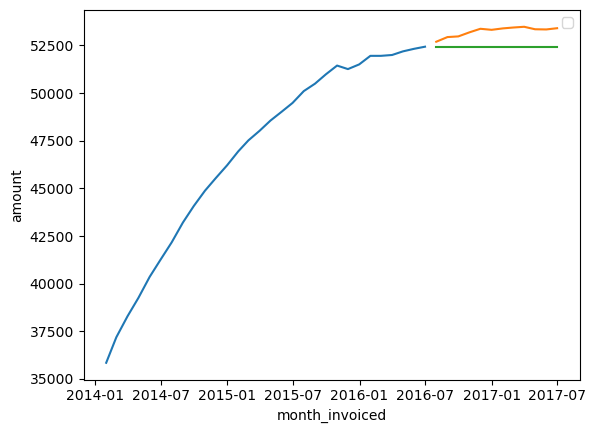

In [53]:
sns.lineplot(data=train, x=train.index, y='amount')
sns.lineplot(data=validate, x=validate.index, y='amount')
sns.lineplot(data=yhat_df, x=yhat_df.index, y='amount')
plt.legend()
plt.show()

In [ ]:
def evaluate(target_var):
    '''
    This function will take the actual values of the target_var from validate, 
    and the predicted values stored in yhat_df, 
    and compute the rmse, rounding to 0 decimal places. 
    it will return the rmse. 
    '''
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

In [48]:
rmse = round(sqrt(mean_squared_error(validate['amount'], yhat_df['amount'])), 0)
rmse

840.0

#### Simple Average

In [54]:
avg_amount = round(train['amount'].mean(), 2)

yhat_df = pd.DataFrame({'amount': [avg_amount]},
                        index=validate.index)

yhat_df.head()

,amount
month_invoiced,
2016-07-31,46883.5
2016-08-31,46883.5
2016-09-30,46883.5
2016-10-31,46883.5
2016-11-30,46883.5


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


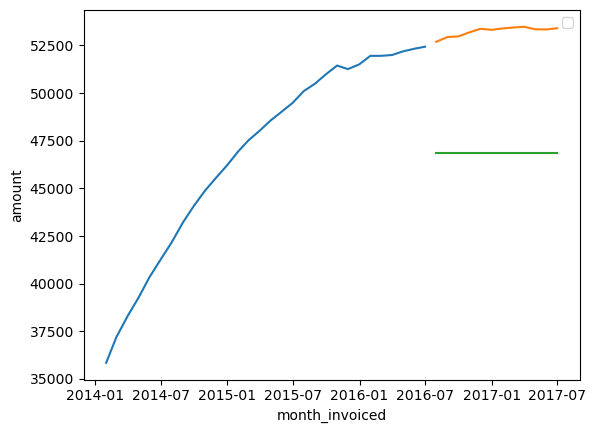

In [55]:
sns.lineplot(data=train, x=train.index, y='amount')
sns.lineplot(data=validate, x=validate.index, y='amount')
sns.lineplot(data=yhat_df, x=yhat_df.index, y='amount')
plt.legend()
plt.show()

In [56]:
rmse = round(sqrt(mean_squared_error(validate['amount'], yhat_df['amount'])), 0)
rmse

6363.0

#### Moving Average

In [59]:
train['amount'].rolling(3).mean() #3 chosen to reflect quarterly moving average

month_invoiced
2014-01-31             NaN
2014-02-28             NaN
2014-03-31    37111.666667
2014-04-30    38246.666667
2014-05-31    39301.666667
2014-06-30    40288.333333
2014-07-31    41260.000000
2014-08-31    42211.666667
2014-09-30    43151.666667
2014-10-31    44055.000000
2014-11-30    44833.333333
2014-12-31    45545.000000
2015-01-31    46233.333333
2015-02-28    46891.666667
2015-03-31    47496.666667
2015-04-30    48035.000000
2015-05-31    48536.666667
2015-06-30    49023.333333
2015-07-31    49538.333333
2015-08-31    50028.333333
2015-09-30    50528.333333
2015-10-31    50975.000000
2015-11-30    51230.000000
2015-12-31    51403.333333
2016-01-31    51573.333333
2016-02-29    51805.000000
2016-03-31    51970.000000
2016-04-30    52048.333333
2016-05-31    52171.666667
2016-06-30    52316.666667
Freq: M, Name: amount, dtype: float64

In [60]:
period = 3

rolling_amount = round(train['amount'].rolling(period).mean()[-1], 2)

yhat_df = pd.DataFrame({'amount': [rolling_amount]},
                         index=validate.index)
yhat_df.head()

,amount
month_invoiced,
2016-07-31,52316.67
2016-08-31,52316.67
2016-09-30,52316.67
2016-10-31,52316.67
2016-11-30,52316.67


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


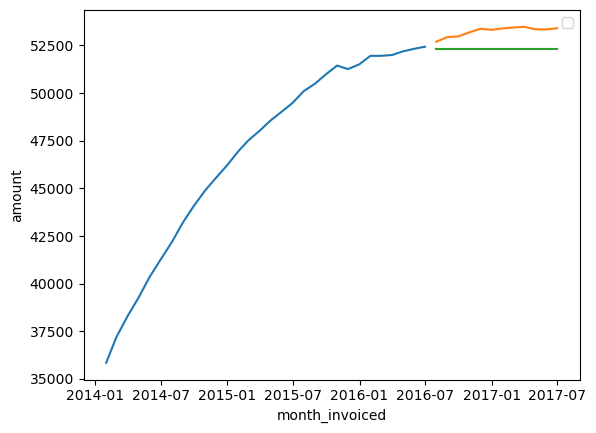

In [61]:
sns.lineplot(data=train, x=train.index, y='amount')
sns.lineplot(data=validate, x=validate.index, y='amount')
sns.lineplot(data=yhat_df, x=yhat_df.index, y='amount')
plt.legend()
plt.show()

In [62]:
rmse = round(sqrt(mean_squared_error(validate['amount'], yhat_df['amount'])), 0)
rmse

954.0

#### Holt's Linear Trend

In [63]:
import statsmodels.api as sm
from statsmodels.tsa.api import Holt, ExponentialSmoothing

In [65]:
model = Holt(train['amount'], exponential=False, damped_trend=True)
model = model.fit(optimized=True)

yhat_values = model.predict(start = validate.index[0]
                           , end = validate.index[-1])
yhat_df['amount'] = round(yhat_values, 2)

In [66]:
yhat_df.head()

,amount
month_invoiced,
2016-07-31,52574.65
2016-08-31,52694.60
2016-09-30,52811.35
2016-10-31,52925.00
2016-11-30,53035.63


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


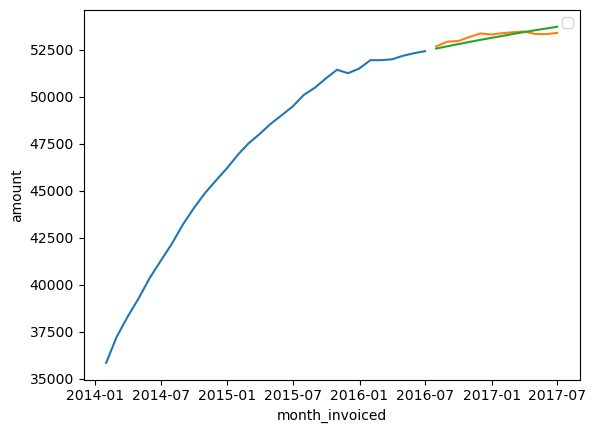

In [67]:
sns.lineplot(data=train, x=train.index, y='amount')
sns.lineplot(data=validate, x=validate.index, y='amount')
sns.lineplot(data=yhat_df, x=yhat_df.index, y='amount')
plt.legend()
plt.show()

In [68]:
rmse = round(sqrt(mean_squared_error(validate['amount'], yhat_df['amount'])), 0)
rmse

221.0